In [12]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize#Se cargan todas las librerías que vamos a usar

import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



In [42]:
data = pd.read_csv('sentiment_tweets3.csv')
dataset = data[['message to examine']]
dataset

,message to examine
0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...
10309,No Depression by G Herbo is my mood from now o...
10310,What do you do when depression succumbs the br...
10311,Ketamine Nasal Spray Shows Promise Against Dep...
10312,dont mistake a bad day with depression! everyo...


In [49]:

def limpiar_texto(data):

    for index, row in data.iterrows(): 
        #print(row)
        message = row['message to examine']
        #print(message)
        new_line = re.sub(r'Ã|Â|[^\x20-\x7E]|ì|ë|°|ï|½|<Emoji:\s*[^>]+>|https?://\S+|www\.\S+|\b\S+\.com\S+\b|[@#]\w+|@|¦|¢',"", message)
        #print(new_line)
        new2 = new_line.lower()
        tokenizer = TweetTokenizer()
        sep = tokenizer.tokenize(new2)
        #print(sep)
        stopW = set(stopwords.words('english'))
        #print(stopW)
        
        for lista in sep:
            filtered_sentence = [word for word in sep if not word in stopW]
            #print(filtered_sentence)
            
#        filtered_sentence = []
#        for word in sep:
#            if word not in stopW:
#                filtered_sentence.append(word)

            lemat = SnowballStemmer('english')
            stems = [lemat.stem(word) for word in filtered_sentence]
        #print(stems)
        final_text = ' '.join(stems)
        #print(final_text)
        #data[message] == final_text 
        data.at[index, 'message to examine'] = final_text
    #print(len(data))
        
    return data

In [51]:
limpiar_texto(dataset)


,message to examine
0,"real good moment . missssssssss much ,"
1,read manga
2,-
3,"need send ' em account tomorrow . odd , even r..."
4,add myspac ! ! !


In [52]:
dataset[0:5]

,message to examine
0,"real good moment . missssssssss much ,"
1,read manga
2,-
3,"need send ' em account tomorrow . odd , even r..."
4,add myspac ! ! !


In [61]:
from textblob import TextBlob
def clasificador(data):
    labels = []
    for index, row in data.iterrows(): 
        message = row['message to examine']
        text = TextBlob(message)
        sentiment_polarity = text.sentiment.polarity
        #print(sentiment_polarity, text)
        
        if -1 <= sentiment_polarity <= -0.8:
            label = "Hater"
        elif -0.8 < sentiment_polarity < 0:
            label = "Molesto"
        elif sentiment_polarity == 0:
            label = "Neutro"
        elif 0 < sentiment_polarity < 0.8:
            label = "Contento"
        elif 0.8 <= sentiment_polarity <= 1:
            label= "Muy feliz"
        labels.append(label)
        
#        print(line, text, sentiment_polarity, label)
#    print(labels)
#    print(len(labels))
#    print(len(data),len(labels))
#    print(data[0:5])
    data['label'] = labels
#    data.insert(loc=1, column='label', value=labels)
    
#    print(data)
    return data


In [62]:
clasificador(dataset)

C:\Users\lucia\AppData\Local\Temp\ipykernel_27864\2259067432.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = labels


,message to examine,label
0,"real good moment . missssssssss much ,",Contento
1,read manga,Neutro
2,-,Neutro
3,"need send ' em account tomorrow . odd , even r...",Molesto
4,add myspac ! ! !,Neutro
...,...,...
10309,"depress g herbo mood , i'm done stress peopl d...",Molesto
10310,depress succumb brain make feel like never eno...,Molesto
10311,"ketamin nasal spray show promi depress , suicid",Molesto
10312,dont mistak bad day depress ! everyon ' em !,Molesto


In [63]:
dataset[0:5]

,message to examine,label
0,"real good moment . missssssssss much ,",Contento
1,read manga,Neutro
2,-,Neutro
3,"need send ' em account tomorrow . odd , even r...",Molesto
4,add myspac ! ! !,Neutro


In [84]:
atributos = dataset["message to examine"]
#Vectorización del texto del atributo con el codificador CountVectorizer
vectorizer = CountVectorizer()
#Conversión de los atributos en valores numéricos
atributos = vectorizer.fit_transform(atributos)
#print(atributos)
objetivo = dataset["label"]

(atributos_entrenamiento, atributos_prueba, objetivo_entrenamiento, objetivo_prueba) = train_test_split(atributos, objetivo,
                                                                                                        random_state=12345,
                                                                                                        test_size=.2,
                                                                                                        stratify=objetivo)
#Entrenamiento del modelo de Naive Bayes usando la instancia MultinomialNB
sentiment_detector = MultinomialNB(alpha=1.0)  # alpha es el parámetro de suavizado
sentiment_detector.fit(atributos_entrenamiento, objetivo_entrenamiento)

#Predicciones con el conjunto de prueba
predicciones = sentiment_detector.predict(atributos_prueba)
#Cálculo de la precisión del modelo
precision = sentiment_detector.score(atributos_prueba, objetivo_prueba)
print("La precisión del modelo desarrollado es", precision*100)


La precisión del modelo desarrollado es 71.25545322346098


### Ejemplo con tweets nuevos


In [104]:
tweets = pd.read_excel('my_tweets.xlsx')
tweets[0:5]


,message to examine
0,hating on me is still being obsessed with me
1,whatever you say man with big autistic eyes
2,first time getting a setlist at a concert toni...
3,wuthering heights to MOTHERing nights
4,this looks like a yearbook for a school where ...


In [106]:
limpiar_texto(tweets)
clasificador(tweets)

,message to examine,label
0,hate still obsess,Hater
1,whatev say man big autist eye,Neutro
2,first time get setlist concert tonight big day,Contento
3,wuther height mother night,Neutro
4,look like yearbook school student kafka,Neutro
5,save hot chocol save hot chocol save,Contento
6,need warm mint tea cat lap get paper,Contento
7,yeah im ok need nap 8 hour,Contento
8,mani mani thought john cassavet columbo,Neutro
9,ok claim honorari member autism club,Contento


label
Neutro      16
Contento     7
Molesto      5
Hater        2
Name: count, dtype: int64


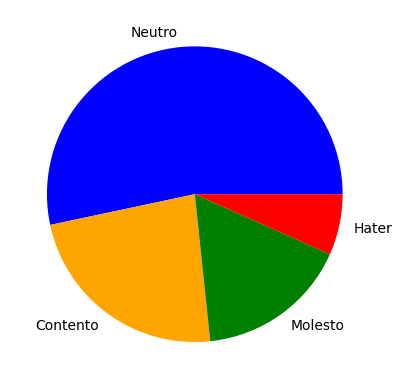

In [123]:
valores = tweets.value_counts('label')
#print(valores)
labels= ['Neutro','Contento','Molesto', 'Hater']
plt.pie(valores, labels= labels, colors=colors)
plt.show()